In [1]:
pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/neeraj.rastogi/Library/Python/3.9/lib/python/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:

s1 = "My name is ABC"
s2 = "I am ABC"
print("FuzzyWuzzy Ratio:", fuzz.ratio(s1, s2))
print("FuzzyWuzzy PartialRatio: ", fuzz.partial_ratio(s1, s2))
print("FuzzyWuzzy TokenSortRatio: ", fuzz.token_sort_ratio(s1, s2))
print("FuzzyWuzzy TokenSetRatio: ", fuzz.token_set_ratio(s1, s2))
print("FuzzyWuzzy WRatio: ", fuzz.WRatio(s1, s2), "\n\n")

FuzzyWuzzy Ratio: 64
FuzzyWuzzy PartialRatio:  62
FuzzyWuzzy TokenSortRatio:  55
FuzzyWuzzy TokenSetRatio:  55
FuzzyWuzzy WRatio:  86 




In [4]:

# for process library,
query = "fuzzys for fuzzys"
choices = ["fuzzy for fuzzy", "fuzzy fuzzy", "g. for fuzzys"]
print("List of ratios: ")
print(process.extract(query, choices), "\n")
print("Best among the above list: ", process.extractOne(query, choices))

List of ratios: 
[('g. for fuzzys', 95), ('fuzzy for fuzzy', 94), ('fuzzy fuzzy', 86)] 

Best among the above list:  ('g. for fuzzys', 95)


############################################################################################################################################################


practical 9b

In [8]:
pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:

pip install -U scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:

import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [22]:
print(quality)
quality
tip

Antecedent: quality


Consequent: tip

In [10]:
quality.automf(3)
service.automf(3)

In [11]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

/Users/neeraj.rastogi/Library/Python/3.9/lib/python/site-packages/skfuzzy/control/term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/neeraj.rastogi/Library/Python/3.9/lib/python/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


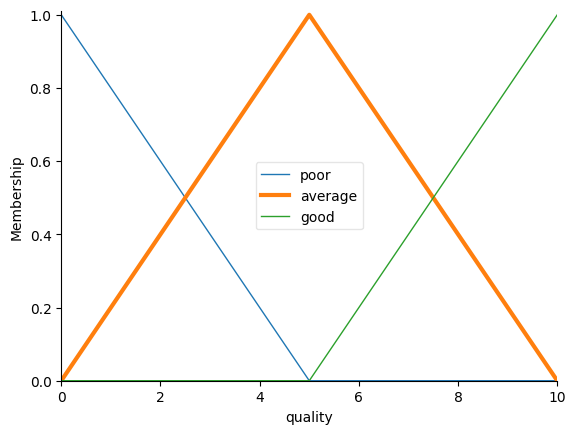

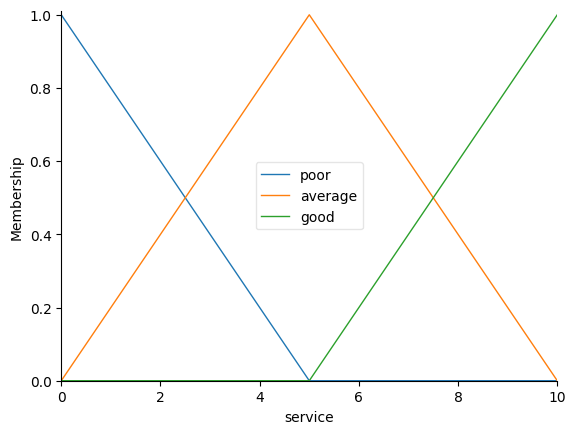

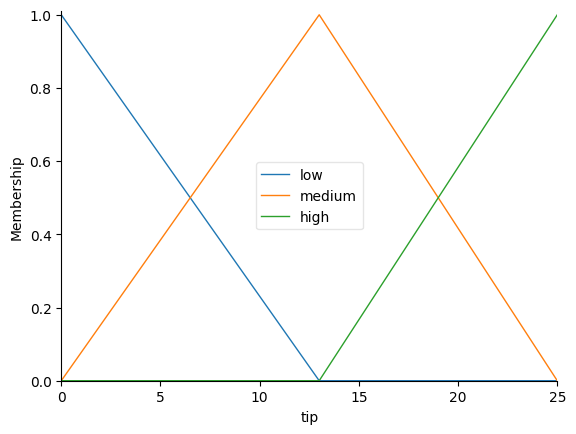

In [12]:
quality['average'].view()
service.view()
tip.view()

In [13]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

In [15]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [16]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

19.847607361963195


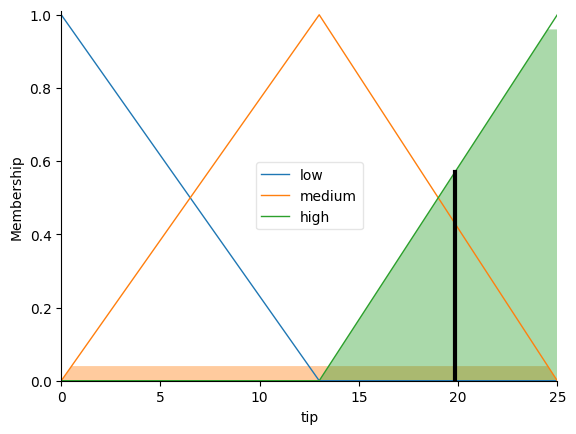

In [17]:
tipping.compute()
print (tipping.output['tip'])
tip.view(sim=tipping)

19.847607361963195


/Users/neeraj.rastogi/Library/Python/3.9/lib/python/site-packages/skfuzzy/control/term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/neeraj.rastogi/Library/Python/3.9/lib/python/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


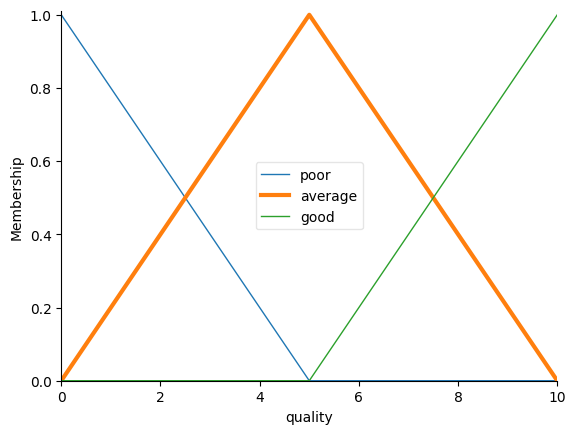

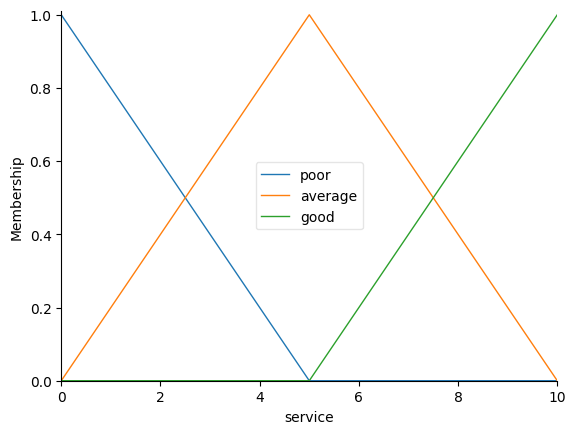

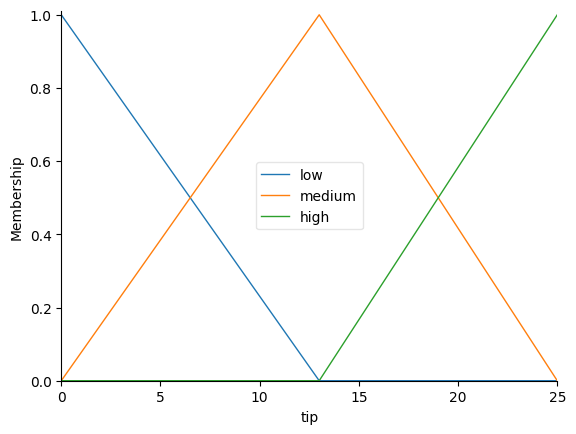

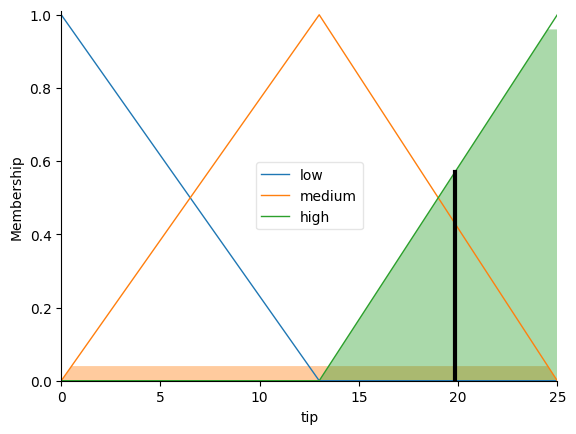

In [2]:
import skfuzzy as fuzz                     # fuzzy logic library  
from skfuzzy import control as ctrl       # control-system module  
import numpy as np                        # numeric arrays  

# 1. Define fuzzy variables (Antecedents = inputs, Consequent = output)
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')   # food quality input 0-10  
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')   # service quality input 0-10  
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')          # tip output 0-25%  

# 2. Auto-generate membership functions for inputs
quality.automf(3)   # creates three fuzzy terms: poor, average, good  
service.automf(3)   # same for service  

# 3. Define membership functions for output (tip)
tip['low']    = fuzz.trimf(tip.universe, [0,  0,  13])    # low tip from 0-13  
tip['medium'] = fuzz.trimf(tip.universe, [0,  13, 25])    # medium tip  
tip['high']   = fuzz.trimf(tip.universe, [13, 25, 25])    # high tip  

# 4. (Optional) Visualize the membership functions  
quality['average'].view()  
service.view()  
tip.view()  

# 5. Define fuzzy rules
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])         # if quality OR service is poor → low tip  
rule2 = ctrl.Rule(service['average'], tip['medium'])                     # if service is average → medium tip  
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])        # if service OR quality is good → high tip  

# 6. Build control system & simulation
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])                # combine rules  
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)                   # create simulator  

# 7. Pass crisp inputs and compute
tipping.input['quality'] = 6.5   # example quality  
tipping.input['service'] = 9.8   # example service  
tipping.compute()                # run fuzzy inference  

# 8. Get output and (optional) view result
print(tipping.output['tip'])     # print crisp tip value  
tip.view(sim=tipping)            # show result on membership graph  
